# Machine Learning

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Let's create a sample DataFrame
df = pd.DataFrame({"Age": [1,2,3,4,5,6,7,8,9,100]})
print("Original DataFrame:")
print(df)

Original DataFrame:
   Age
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
9  100


### What is a Z-Score?
### A `Z-score` tells you how far away a data point is from the mean (average) of a dataset, measured in standard deviations. It helps you understand whether a value is typical or unusual compared to the rest of the data.
### Formula : Z = (X−μ) / σ
​
 


In [3]:
# Calculating the mean and standard deviation
mean_age = df["Age"].mean()
std_age = df["Age"].std()
print("\nMean Age:", mean_age)
print("Standard Deviation of Age:", std_age)
# Calculating the z-scores
df["Z-Score"] = (df["Age"] - mean_age) / std_age
print("\nDataFrame with Z-Scores:")
print(df)


Mean Age: 14.5
Standard Deviation of Age: 30.152390728873666

DataFrame with Z-Scores:
   Age   Z-Score
0    1 -0.447726
1    2 -0.414561
2    3 -0.381396
3    4 -0.348231
4    5 -0.315066
5    6 -0.281901
6    7 -0.248736
7    8 -0.215572
8    9 -0.182407
9  100  2.835596


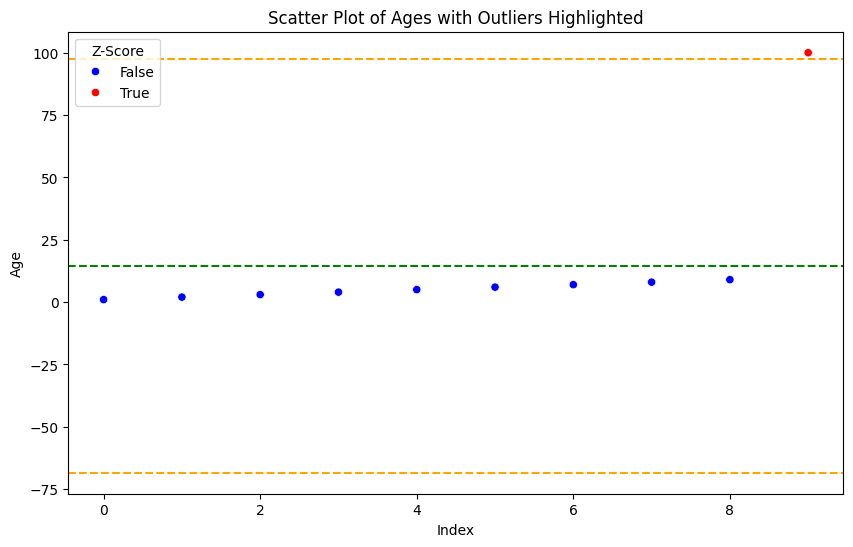

In [4]:
# Let's draw a scatter plot to visualize the outliers in the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df["Age"], hue=df["Z-Score"].abs() > 2.75, palette={True: "red", False: "blue"})
plt.axhline(mean_age, color='green', linestyle='--', label='Mean Age')
plt.axhline(mean_age + 2.75 * std_age, color='orange', linestyle='--', label='Mean + 2.75 Std Dev')
plt.axhline(mean_age - 2.75 * std_age, color='orange', linestyle='--', label='Mean - 2.75 Std Dev')
plt.title("Scatter Plot of Ages with Outliers Highlighted")
plt.xlabel("Index")
plt.ylabel("Age")
plt.show()

- We can see that in the above dataframe there is a outlier 

In [5]:
print(f"Here are the outliers based on the z-score threshold, 2.75:\n {df[df['Z-Score'] > 2.75]}")
print("----------------------------------------")

Here are the outliers based on the z-score threshold, 2.75:
    Age   Z-Score
9  100  2.835596
----------------------------------------


In [6]:

# Removing outliers
df_no_outliers = df[df["Z-Score"].abs() <= 2.75]
print("DataFrame after removing outliers:")
print(df_no_outliers)

DataFrame after removing outliers:
   Age   Z-Score
0    1 -0.447726
1    2 -0.414561
2    3 -0.381396
3    4 -0.348231
4    5 -0.315066
5    6 -0.281901
6    7 -0.248736
7    8 -0.215572
8    9 -0.182407


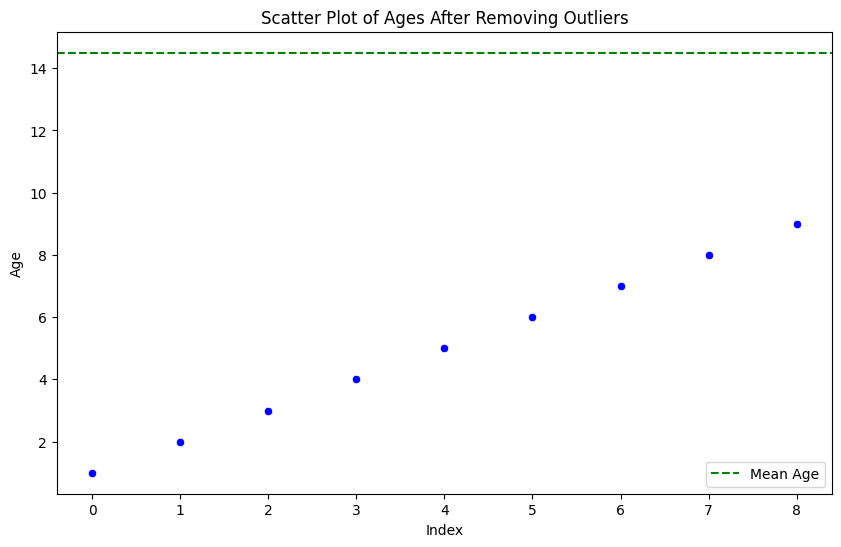

In [7]:
# Visualizing the DataFrame after removing outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_no_outliers.index, y=df_no_outliers["Age"], color='blue')
plt.axhline(mean_age, color='green', linestyle='--', label='Mean Age')
plt.title("Scatter Plot of Ages After Removing Outliers")
plt.xlabel("Index")
plt.ylabel("Age")
plt.legend()
plt.show()

In [8]:
from scipy import stats

# Sample data
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 2.5 
outliers = np.where(z_scores > threshold)[0]

# print the data
print("----------------------------------------")
print("Data:", data)
print("----------------------------------------")

print("Indices of Outliers:", outliers)
print("Outliers:", [data[i] for i in outliers])

# Remove outliers
data = [data[i] for i in range(len(data)) if i not in outliers]
print("----------------------------------------")
print("Data without outliers:", data)

----------------------------------------
Data: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
----------------------------------------
Indices of Outliers: [9]
Outliers: [110.0]
----------------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


# Inter Quartile Range

In [12]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np

# Step 2: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 40]})

# Step 3: Calculate the first and third quartile
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')

# Step 4: Calculate the IQR
IQR = Q3 - Q1

# Step 5: Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 6: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")
# Step 7: Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]}")
print("----------------------------------------")
# Step 8: Remove the outliers
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Step 9: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

----------------------------------------
Here is the data with outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   40
----------------------------------------
Here are the outliers based on the IQR threshold:
     Age
11   40
----------------------------------------
Here is the data without outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30


# Clustring

In [14]:
# Import the required library
from sklearn.cluster import KMeans

# Define the dataset
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

# Initialize the KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# Assign cluster labels to each data point
cluster_labels = kmeans.labels_

# Determine which cluster is the outlier cluster (the smaller one)
import numpy as np
counts = np.bincount(cluster_labels)
outlier_cluster = np.argmin(counts)

# Extract outliers based on the identified cluster
outliers = [point for point, label in zip(data, cluster_labels) if label == outlier_cluster]

# Display results
print("Original Data:", data)
print("Detected Outliers:", outliers)

# Remove outliers from the data
filtered_data = [point for point, label in zip(data, cluster_labels) if label != outlier_cluster]
print("Data after removing outliers:", filtered_data)

Original Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
Detected Outliers: [[2, 2], [3, 3], [3, 4]]
Data after removing outliers: [[30, 30], [31, 31], [32, 32]]
